# Basic Graphs

In this notebook we present three visualizations that provide initial insights into the COVID-19 dataset.

In [10]:
# --- Imports ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go

# --- Load data ---
file_path = "../Data/Covid_19_dataset.csv"
df = pd.read_csv(file_path)

# --- Convert date to datetime ---
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Project color palette (same for Seaborn & Plotly)
project_palette = ["#0474ed","#91f0fa","#08a29e","#a2b458","#a6cabd","#326164"]

# Seaborn will use this
palette_seaborn = project_palette * 2

# Plotly will use this
palette_plotly = project_palette

## 1. Top 10 most populous countries

(Bar chart of population based on dataset)


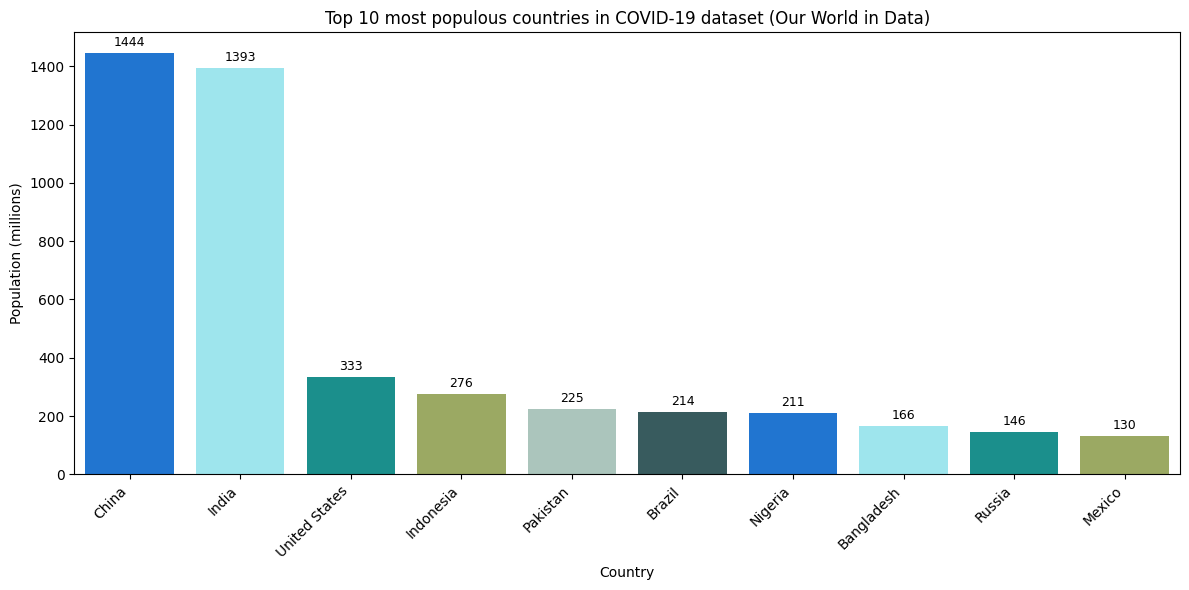

In [11]:
# Top 10 by population
top10 = (df.groupby("location", as_index=False)["population"].max()
           .nlargest(10, "population"))

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=top10,
    x="location",
    y="population",
    hue="location",
    palette=palette_seaborn[:10],
    legend=False
)

ax.set_title("Top 10 most populous countries in COVID-19 dataset (Our World in Data)")
ax.set_xlabel("Country")
ax.set_ylabel("Population (millions)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,_: f"{x/1e6:.0f}"))

# Annotate values above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()/1e6:.0f}",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9,
                xytext=(0,3), textcoords="offset points")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 2. Population vs. Life Expectancy across countries

(Scatter plot to show demographic context)


In [12]:
# Unique records per country
df_countries = df.groupby(
    ["iso_code", "continent", "location"], as_index=False
)[["population", "life_expectancy"]].max()

# Scatter plot
fig = px.scatter(
    df_countries,
    x="population",
    y="life_expectancy",
    color="continent",
    hover_name="location",
    size="population",
    size_max=60,
    log_x=True,
    color_discrete_sequence=palette_plotly,
    title="Population vs. Life Expectancy across Countries (COVID-19 dataset)",
    labels={
        "population": "Population",
        "life_expectancy": "Life Expectancy",
        "continent": "Continent"
    }
)

fig.update_layout(
    width=1200,
    height=600,
    xaxis_title="Population (log scale)",
    yaxis_title="Life Expectancy (years)",
    xaxis=dict(type="log", range=[6, 10])
)

fig.show()


## 3. Cumulative number of positive cases and deaths in a selected country

(Line chart comparing cases and deaths over time)

In [ ]:
# Daily new cases

# Select countries (edit as needed)
countries = ["United States", "India"]

# Prepare data
df_two = (df.loc[df["location"].isin(countries), ["location", "date", "new_cases"]]
            .dropna(subset=["new_cases"])
            .copy())
df_two = df_two.sort_values(["location", "date"])
df_two["new_cases_smooth"] = (df_two.groupby("location")["new_cases"]
                                .transform(lambda x: x.rolling(7, min_periods=1).mean()))

# Plot
fig = px.line(
    df_two,
    x="date",
    y="new_cases_smooth",
    color="location",
    color_discrete_sequence=palette_plotly,  # project palette
    title=f"Daily new COVID-19 cases: {countries[0]} vs {countries[1]}",
    labels={
        "date": "Date",
        "new_cases_smooth": "New Cases",
        "location": "Country"
    }
)
fig.update_layout(width=1200, height=600, xaxis_title="Date", yaxis_title="New cases")
fig.show()


## Summary

The three graphs highlight:
- The demographic weight of the most populous countries (China, India, US).  
- A positive relationship between higher life expectancy and wealthier/densely populated countries.  
- The different dynamics of the pandemic between India and the United States, with visible peaks corresponding to successive waves.  

These exploratory visualizations confirm that the dataset is well-suited for further interactive dashboards.